<h2>About this Project</h2>
<p>In this project, you will use naive bayes to build a baby name classifier. Your classifier will use the features commonly found in names to distinguish whether a name is likely to be given to a baby girl or boy. You'll train your classifier to identify these certain qualities of names and classify new examples based on those qualities.</p>

<h3>Evaluation</h3>

<p><strong>This project must be successfully completed and submitted in order to receive credit for this course. Your score on this project will be included in your final grade calculation.</strong><p>
    
<p>You are expected to write code where you see <em># YOUR CODE HERE</em> within the cells of this notebook. Not all cells will be graded; code input cells followed by cells marked with <em>#Autograder test cell</em> will be graded. Upon submitting your work, the code you write at these designated positions will be assessed using an "autograder" that will run all test cells to assess your code. You will receive feedback from the autograder that will identify any errors in your code. Use this feedback to improve your code if you need to resubmit. Be sure not to change the names of any provided functions, classes, or variables within the existing code cells, as this will interfere with the autograder. Also, remember to execute all code cells sequentially, not just those you’ve edited, to ensure your code runs properly.</p>
    
<p>You can resubmit your work as many times as necessary before the submission deadline. If you experience difficulty or have questions about this exercise, use the Q&A discussion board (found in the Live Labs section of this course) to engage with your peers or seek assistance from the instructor.<p>

<p>Before starting your work, please review <a href="https://s3.amazonaws.com/ecornell/global/eCornellPlagiarismPolicy.pdf">eCornell's policy regarding plagiarism</a> (the presentation of someone else's work as your own without source credit).</p>

<h3>Submit Code for Autograder Feedback</h3>

<p>Once you have completed your work on this notebook, you will submit your code for autograder review. Follow these steps:</p>

<ol>
    <li><strong>Save your notebook —</strong> Click <strong>Save and Checkpoint</strong> in the "File" menu.</li>
  <li><strong>Mark as Completed —</strong> In the blue menu bar along the top of this code exercise window, you’ll see a menu item called <strong>Education</strong>. In the <strong>Education</strong> menu, click <strong>Mark as Completed</strong> to submit your code for autograder/instructor review. This process will take a moment and a progress bar will show you the status of your submission.</li>
	<li><strong>Review your results —</strong> Once your work is marked as complete, the results of the autograder will automatically be presented in a new tab within the code exercise window. You can click on the assessment name in this feedback window to see more details regarding specific feedback/errors in your code submission.</li>
  <li><strong>Repeat, if necessary —</strong> The Jupyter notebook will always remain accessible in the first tabbed window of the exercise. To reattempt the work, you will first need to click <strong>Mark as Uncompleted</strong> in the <strong>Education</strong> menu and then proceed to make edits to the notebook. Once you are ready to resubmit, follow steps one through three. You can repeat this procedure as many times as necessary.</li>
</ol>

<h2>Getting Started</h2>
<h3>Prepare Text for Machine Learning </h3>

<p> If we are to create a classifier for text, we'll first need to think about the format of our data. Take a look at the files <code>girls.train</code> and <code>boys.train</code>. For example with the unix command: <pre>cat girls.train</pre> 
<pre>
...
Addisyn
Danika
Emilee
Aurora
Julianna
Sophia
Kaylyn
Litzy
Hadassah
</pre>
This file contains names that are more or less commonly used for girls. The problem with the current data in this file is that the names are in plain text, which is not a format our machine learning algorithm can work with effectively. You need to transform these plain text names into some vector format, where each name becomes a vector that represents a point in some high dimensional input space. </p>

<p>That is exactly what the following Python function <code>name2features</code> does, by arbitrarily chunking and hashing different string extractions from each baby name inputted, thus transforming the string into a quantitative feature vector:</p>

<h3>Python Initialization</h3>
<p>Please run the following code to initialize your Python kernel. You should be running a version of Python 3.x.<p>

In [1]:
import sys
sys.path.append('/home/codio/workspace/.guides/hf')
from helper import *

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
print('You\'re running python %s' % sys.version.split(' ')[0])

You're running python 3.6.8


### The <code>hashfeatures</code> and <code>name2features</code> Functions
Below, the <code>hashfeatures</code> and <code>name2features</code> functions will take the plain text names and convert them to binary feature vectors (vectors with 0s and 1s) so that you'll be able to work with the data effectively.  

#### Converting non-numeric training data to numeric vectors
The `hashfeatures` function relies on Python's [inbuilt `hash` function](https://docs.python.org/3/library/functions.html#hash), which converts any data type in Python to a large integer. The `hash` function ensures that the same objects have the same hash output in _a single Python session_. Across different Python sessions, you can ensure `hash` outputs the same integer for the same objects by seeding it.

In our case, `hash` will convert string objects to integers, which we will "truncate" to our desired dimension `d`.

`hashfeatures` has been implemented for you. It works as follows: It splits the `baby` name `FIX` times such that split `0 < m <= FIX` gives 2 strings. The first is a prefix of `baby` of length `m` and the second is the suffix of `baby` of length `m`.

For example, with `debug=True`, calling `hashfeatures` on `Addisyn` with `d=128` and `FIX=3` will give strings:
- `(A>, <n)`
- `(Ad>, <yn)`
- `(Add>, <syn)`

Let's call each split's output `(prefix, suffix)`. `hashfeatures` then converts both prefix and suffix to large integers `P` and `S` using `hash`. However, since we need a binary feature vector of `d` dimensions, `hashfeatures` takes the remainder of `P` and `S` with `d`, and sets the (`P % d`)<sup>th</sup> and (`S % d`)<sup>th</sup> dimensions of the feature vector to 1.

We define the `hashfeatures` function to output binary vectors, but they need not be binary; they can also have floating point values. In the **Challenge** section later in this assignment, you will be able to try your own `name2features` function to improve the model's performance.

In [2]:
def hashfeatures(baby, d, FIX, debug=False):
    """
    Input:
        baby : a string representing the baby's name to be hashed
        d: the number of dimensions to be in the feature vector
        FIX: the number of chunks to extract and hash from each string
        debug: a bool for printing debug values (default False)
    
    Output:
        v: a feature vector representing the input string
    """
    v = np.zeros(d)
    for m in range(1, FIX+1):
        prefix = baby[:m] + ">"
        P = hash(prefix) % d
        v[P] = 1
        
        suffix = "<" + baby[-m:]
        S = hash(suffix) % d
        v[S] = 1
        
        if debug:
            print(f"Split {m}/{FIX}:\t({prefix}, {suffix}),\t1s at indices [{P}, {S}]")
    if debug:
        print(f"Feature vector for {baby}:\n{v.astype(int)}\n")
    return v

#### Changing `hashfeatures` arguments


##### Changing `d`
It is likely that different strings get hashed to different numbers, but trigger the same dimension in the feature vector to be 1, thus causing **collisions**. This is because the length of our feature vector `d` is generally much smaller than the magnitudes of `hash` outputs. We can reduce the number of collisions by increasing `d` and reducing the likelihood of `P % d` or `S % d` for different strings being equal. If `FIX` is left unchanged, then short `baby` names will trigger fewer dimensions of this longer feature vector, resulting in sparsity. Although the resulting vectors are more _expressive_, we will likely face the curse of dimensionality if we carelessly increase `d`. Moreover, if the model is also expressive enough, expressive feature vectors often result in **model overfitting**: model not generalizing well to unseen test data because it fits training data almost _too_ well.

On the other hand, reducing `d` causes the number of collisions to generally increase by increasing the likelihood of `P % d` or `S % d` of different strings to be equal. This creates dense vectors that are not very expressive (feature vectors for different baby names will start having 1s in the same dimensions as `d` decreases). When feature vectors are not very expressive, it becomes difficult for models to learn classification boundaries between different classes, causing **model underfitting**: model not generalizing well to unseen test data because it cannot learn decision boundaries effectively.

##### Changing `FIX`
On the lines of overfitting and underfitting, take some time and think what the effect of changing `FIX` will be on feature vector density, and possibly model performance down-the-road.

In the trivial case, we do not want `FIX` to be very large. If `FIX` is larger than the length of `baby` name, then we will be running the loop in `hashfeatures` for extra iterations but computing the same prefixes and suffixes (running `Max` with `FIX=5` will give `(Max>, <Max)` for iterations `m=3` onwards.

The non-trivial case is when `FIX` is generally smaller than lengths of most `baby` names. `FIX=1` will only split once and give sparse feature vectors if `d` is reasonably large, whereas `FIX=5` will split 5 times and give denser vectors.

Let's test `hashfeatures` on a few examples, varying `baby`, `d`, and `FIX`.

In [3]:
v = hashfeatures("Addisyn", d=128, FIX=3, debug=True)
v = hashfeatures("Addisyn", d=4, FIX=3, debug=True)
v = hashfeatures("Addisyn", d=128, FIX=7, debug=True)
v = hashfeatures("Max", d=128, FIX=4, debug=True)

Split 1/3:	(A>, <n),	1s at indices [13, 105]
Split 2/3:	(Ad>, <yn),	1s at indices [20, 23]
Split 3/3:	(Add>, <syn),	1s at indices [9, 53]
Feature vector for Addisyn:
[0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]

Split 1/3:	(A>, <n),	1s at indices [1, 1]
Split 2/3:	(Ad>, <yn),	1s at indices [0, 3]
Split 3/3:	(Add>, <syn),	1s at indices [1, 1]
Feature vector for Addisyn:
[1 1 0 1]

Split 1/7:	(A>, <n),	1s at indices [13, 105]
Split 2/7:	(Ad>, <yn),	1s at indices [20, 23]
Split 3/7:	(Add>, <syn),	1s at indices [9, 53]
Split 4/7:	(Addi>, <isyn),	1s at indices [21, 42]
Split 5/7:	(Addis>, <disyn),	1s at indices [112, 2]
Split 6/7:	(Addisy>, <ddisyn),	1s at indices [119, 3]
Split 7/7:	(Addisyn>, <Addisyn),	1s at indices [115, 72]
Feature vector for Addisyn:
[0 0 1 1 0 0 0 0 0 1 0

The key takeaway here is that the feature extraction process is highly tunable and will almost always impact model performance. While you may sometimes be able to manually select key features by perusing training data, it is often good practice to run multiple experiments with different approaches to define the set of features.

In [4]:
def name2features(filename, d=128, FIX=3, LoadFile=True, debug=False):
    """
    Output:
        X : n feature vectors of dimension d, (nxd)
    """
    # read in baby names
    if LoadFile:
        with open(filename, 'r') as f:
            babynames = [x.rstrip() for x in f.readlines() if len(x) > 0]
    else:
        babynames = filename.split('\n')
    n = len(babynames)
    X = np.zeros((n, d))
    for i in range(n):
        X[i,:] = hashfeatures(babynames[i], d, FIX)
    return (X, babynames) if debug else X

In the code cell above, `name2features` reads every name in the given file and converts it into a 128-dimensional feature vector by first assembling substrings (based on the parameter `FIX`), then hashing these assembled substrings and modifying the feature vector index (the modulo of the number of dimensions `d`) that corresponds to this hash value.

More often than not, having a good understanding of the training data can help in training a good Machine Learning model. Let's check out the feature matrix visually. On the Y-axis are baby names, and on the X-axis are features for each baby name. The heatmap is white when the feature value is 1 and black otherwise.

You will notice that certain feature indices are white for many baby names. What could be the reason?

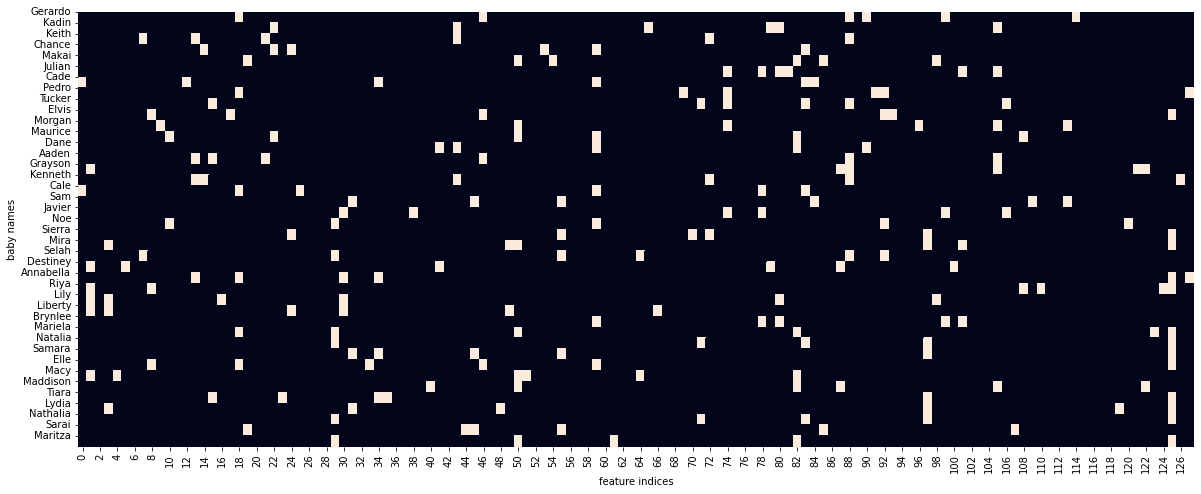

In [5]:
Xboys, namesBoys = name2features("boys.train", d=128, FIX=3, debug=True)
Xgirls, namesGirls = name2features("girls.train", d=128, FIX=3, debug=True)
X = np.concatenate([Xboys[:20], Xgirls[:20]], axis=0)

plt.figure(figsize=(20, 8))
ax = sns.heatmap(X.astype(int), cbar=False)
ax.set_xlabel('feature indices')
ax.set_ylabel('baby names')
ticks = ax.set_yticks(np.arange(40, dtype=int))
ticklabels = ax.set_yticklabels(namesBoys[:20] + namesGirls[:20])
plt.show()

<h3>The <code>genTrainFeatures</code> Function</h3>
<p>We have provided you with a python function <code>genTrainFeatures</code>, which transforms the names into features and loads them into memory. 

In [6]:
def genTrainFeatures(dimension=128):
    """
    Input: 
        dimension: desired dimension of the features
    Output: 
        X: n feature vectors of dimensionality d (nxd)
        Y: n labels (-1 = girl, +1 = boy) (n)
    """
    
    # Load in the data
    Xgirls = name2features("girls.train", d=dimension)
    Xboys = name2features("boys.train", d=dimension)
    X = np.concatenate([Xgirls, Xboys])
    
    # Generate Labels
    Y = np.concatenate([-np.ones(len(Xgirls)), np.ones(len(Xboys))])
    
    # shuffle data into random order
    ii = np.random.permutation([i for i in range(len(Y))])
    
    return X[ii, :], Y[ii]

<p>You can call the following command to return two vectors, one holding all the concatenated feature vectors and one holding the labels of all boys and girls names.</p>

In [7]:
X, Y = genTrainFeatures(128)
print(f'Shape of training data: {X.shape}')
print(f'X:\n{X.astype(int)}')
print(f'Y:\n{Y.astype(int)}')

Shape of training data: (1200, 128)
X:
[[0 0 0 ... 1 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Y:
[-1 -1  1 ...  1 -1  1]


<h2> The Na&iuml;ve Bayes Classifier </h2>

<p> The Na&iuml;ve Bayes classifier is a linear classifier based on Bayes Rule. The following cells will walk you through steps and ask you to finish the necessary functions in a pre-defined order. <strong>As a general rule, you should avoid tight loops at all costs.</strong></p>

<h3>Part One: Class Probability [Graded]</h3>

<p>Estimate the class probability $P(y)$ in 
<b><code>naivebayesPY</code></b>. This should return the probability that a sample in the training set is positive or negative, independent of its features.
</p>

In [10]:
def naivebayesPY(X, Y):
    """
    naivebayesPY(X, Y) returns [pos,neg]

    Computation of P(Y)
    Input:
        X : n input vectors of d dimensions (nxd)
        Y : n labels (-1 or +1) (nx1)

    Output:
        pos: probability p(y=1)
        neg: probability p(y=-1)
    """
    
    Y = np.concatenate([Y, [-1, 1]])
    n = len(Y)

    pos = np.sum(Y == 1) / n
    neg = np.sum(Y == -1) / n

    return pos, neg
    raise NotImplementedError()

In [11]:
# The following tests will check that the probabilities returned by your function sum to 1 (test1) and return the correct probabilities for a given set of input vectors (tests 2-4)

# Check that probabilities sum to 1
def naivebayesPY_test1():
    pos, neg = naivebayesPY(X,Y)
    return np.linalg.norm(pos + neg - 1) < 1e-5

# Test the Naive Bayes PY function on a simple example
def naivebayesPY_test2():
    x = np.array([[0,1],[1,0]])
    y = np.array([-1,1])
    pos, neg = naivebayesPY(x,y)
    pos0, neg0 = .5, .5
    test = np.linalg.norm(pos - pos0) + np.linalg.norm(neg - neg0)
    return test < 1e-5

# Test the Naive Bayes PY function on another example
def naivebayesPY_test3():
        x = np.array([[0,1,1,0,1],
            [1,0,0,1,0],
            [1,1,1,1,0],
            [0,1,1,0,1],
            [1,0,1,0,0],
            [0,0,1,0,0],
            [1,1,1,0,1]])    
        y = np.array([1,-1, 1, 1,-1,-1, 1])
        pos, neg = naivebayesPY(x,y)
        pos0, neg0 = 5/9., 4/9.
        test = np.linalg.norm(pos - pos0) + np.linalg.norm(neg - neg0)
        return test < 1e-5

# Tests plus-one smoothing
def naivebayesPY_test4():
    x = np.array([[0,1,1,0,1],[1,0,0,1,0]])    
    y = np.array([1,1])
    pos, neg = naivebayesPY(x,y)
    pos0, neg0 = 3/4., 1/4.
    test = np.linalg.norm(pos - pos0) + np.linalg.norm(neg - neg0)
    return test < 1e-5    
        
    
runtest(naivebayesPY_test1, 'naivebayesPY_test1')
runtest(naivebayesPY_test2,'naivebayesPY_test2')
runtest(naivebayesPY_test3,'naivebayesPY_test3')
runtest(naivebayesPY_test4,'naivebayesPY_test4')

Running Test: naivebayesPY_test1 ... ✔ Passed!
Running Test: naivebayesPY_test2 ... ✔ Passed!
Running Test: naivebayesPY_test3 ... ✔ Passed!
Running Test: naivebayesPY_test4 ... ✔ Passed!


In [12]:
# Autograder test cell- worth 1 point
# runs naivebayesPY_test1

In [13]:
# Autograder test cell- worth 1 points
# runs naivebayesPY_test2

In [14]:
# Autograder test cell- worth 1 points
# runs naivebayesPY_test3

In [15]:
# Autograder test cell- worth 1 points
# runs naivebayesPY_test4

### Part Two: Conditional Probability [Graded] 

Estimate the conditional probabilities $P([\mathbf{x}]_{\alpha} = 1 | Y = y)$ in 
**`naivebayesPXY`**. Notice that by construction, our features are binary categorical features. Use a **categorical** distribution as model and return the probability vectors for each feature being 1 given a class label.  Note that the result will be two vectors of length `d` (the number of features), where the values represent the probability that feature i is equal to 1.


Here we compute the fraction of counts that a feature is hot or not ($[\mathbf{x}]_\alpha = 1$ or $[\mathbf{x}]_\alpha = 0$) conditioned on gender. For example, if $[\mathbf{x}]_1 = [1, 0, 1, 0, 1]$ and $Y = [1, 1, 1, 1, -1]$ (boy=$1$ and girl=$-1$), then $P([\mathbf{x}]_1 = 1 | Y = 1) = (1 + 0 + 1 + 0)/4 = 0.5$ and $P([\mathbf{x}]_1 = 1 | Y = -1) = (1)/1 = 1$. You need to compute this for each dimension `0 <= i < d` for each gender.

In [22]:
def naivebayesPXY(X,Y):
    """
    naivebayesPXY(X, Y) returns [posprob,negprob]
    
    Input:
        X : n input vectors of d dimensions (nxd)
        Y : n labels (-1 or +1) (n)
    
    Output:
        posprob: probability vector of p(x_alpha = 1|y=1)  (d)
        negprob: probability vector of p(x_alpha = 1|y=-1) (d)
    """
    
    # add one positive and negative example to avoid division by zero ("plus-one smoothing")
    n, d = X.shape
    X = np.concatenate([X, np.ones((2,d)), np.zeros((2,d))])
    Y = np.concatenate([Y, [-1,1,-1,1]])

    pos_mask = (Y == 1)
    neg_mask = (Y == -1)

    posprob = np.sum(X[pos_mask], axis=0) / np.sum(pos_mask)
    negprob = np.sum(X[neg_mask], axis=0) / np.sum(neg_mask)
    
    return posprob, negprob
    raise NotImplementedError()

We can plot the positive and negative probabilities for each feature. You might notice some features having higher conditional probabilities given gender (spikes of one color but low probability of the other color). This could imply that those features are particularly "indicative" in the baby-name classification task. The Naïve Bayes classifier will help us flip the conditional probability $P(\mathbf{x} | Y)$ to get $P(Y | \mathbf{x})$.

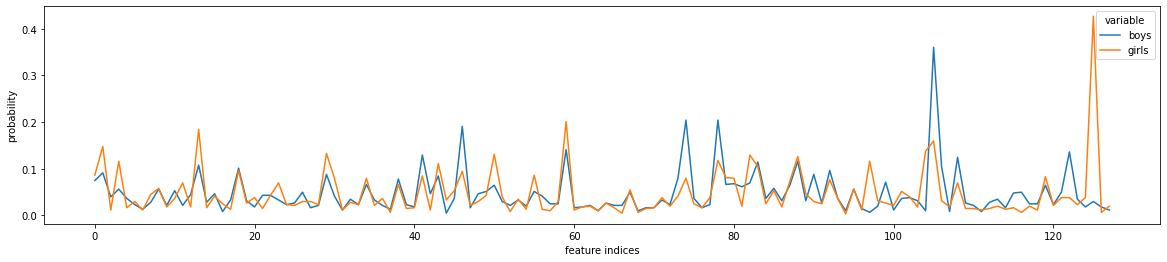

In [23]:
X, Y = genTrainFeatures(128)
posprob, negprob = naivebayesPXY(X, Y)
probs = pd.DataFrame({'feature': np.arange(128, dtype=int), 'boys': posprob, 'girls': negprob})

plt.figure(figsize=(20, 4))
ax = sns.lineplot(x='feature', y='value', hue='variable', data=pd.melt(probs, ['feature']))
ax.set_xlabel('feature indices')
ax.set_ylabel('probability')
plt.show()

In [24]:
# The following tests check that your implementation of naivebayesPXY returns the same posterior probabilities as the correct implementation, in the correct dimensions

# test a simple toy example with two points (one positive, one negative)
def naivebayesPXY_test1():
    x = np.array([[0,1],[1,0]])
    y = np.array([-1,1])
    pos, neg = naivebayesPXY(x,y)
    pos0, neg0 = naivebayesPXY_grader(x,y)
    test = np.linalg.norm(pos - pos0) + np.linalg.norm(neg - neg0)
    return test < 1e-5

# test the probabilities P(X|Y=+1)
def naivebayesPXY_test2():
    pos, neg = naivebayesPXY(X,Y)
    posprobXY, negprobXY = naivebayesPXY_grader(X, Y)
    test = np.linalg.norm(pos - posprobXY) 
    return test < 1e-5

# test the probabilities P(X|Y=-1)
def naivebayesPXY_test3():
    pos, neg = naivebayesPXY(X,Y)
    posprobXY, negprobXY = naivebayesPXY_grader(X, Y)
    test = np.linalg.norm(neg - negprobXY)
    return test < 1e-5


# Check that the dimensions of the posterior probabilities are correct
def naivebayesPXY_test4():
    pos, neg = naivebayesPXY(X,Y)
    posprobXY, negprobXY = naivebayesPXY_grader(X, Y)
    return pos.shape == posprobXY.shape and neg.shape == negprobXY.shape

runtest(naivebayesPXY_test1,'naivebayesPXY_test1')
runtest(naivebayesPXY_test2,'naivebayesPXY_test2')
runtest(naivebayesPXY_test3,'naivebayesPXY_test3')
runtest(naivebayesPXY_test4,'naivebayesPXY_test4')

Running Test: naivebayesPXY_test1 ... ✔ Passed!
Running Test: naivebayesPXY_test2 ... ✔ Passed!
Running Test: naivebayesPXY_test3 ... ✔ Passed!
Running Test: naivebayesPXY_test4 ... ✔ Passed!


In [25]:
# Autograder test cell- worth 1 point
# runs naivebayesPXY_test1

In [26]:
# Autograder test cell- worth 1 point
# runs naivebayesPXY_test2

In [27]:
# Autograder test cell- worth 1 point
# runs naivebayesPXY_test3

In [28]:
# Autograder test cell- worth 1 point
# runs naivebayesPXY_test4

### Part Three: Log Likelihood [Graded]

Calculate the log likelihood $\log P(\mathbf{x}|Y = y)$ for each point in `X_test` given label `Y_test` in **`loglikelihood`**.

#### Recall
1. Naïve Bayes assumption: the likelihood $P(\mathbf{x} | Y = y)$ of a data point $\mathbf{x}$ is equal to the product of the conditional probabilities of each feature $[\mathbf{x}]_\alpha$ having value $x_\alpha$, i.e., 
$$
P(\mathbf{x} | Y = y) = \prod_{\alpha=1}^d P([\mathbf{x}]_\alpha = x_\alpha | Y = y).
$$
For example, with $\mathbf{x} = [1, 0, 1]$ and corresponding label $Y=1$, you will calculate likelihood $P(\mathbf{x} | Y = 1)$ as $P([\mathbf{x}]_1 = 1 | Y = 1) \cdot P([\mathbf{x}]_2 = 0 | Y = 1) \cdot P([\mathbf{x}]_3 = 1 | Y = 1)$.

2. Given probabilities:
    - `posprob` vector: $P([\mathbf{x}]_\alpha = 1 | Y = 1)$
    - `negprob` vector: $P([\mathbf{x}]_\alpha = 1 | Y = -1)$

3. Fact $\log(ab) = \log a + \log b$.

To simplify your code, we recommend calculating log likelihoods for positive points ($\mathbf{x}$ with $Y = 1$) and those for negative points separately.

In [31]:
def loglikelihood(posprob, negprob, X_test, Y_test):
    """
    loglikelihood(posprob, negprob, X_test, Y_test) returns loglikelihood of each point in X_test
    
    Input:
        posprob: conditional probabilities for the positive class (d)
        negprob: conditional probabilities for the negative class (d)
        X_test : features (nxd)
        Y_test : labels (-1 or +1) (n)
    
    Output:
        loglikelihood of each point in X_test (n)
    """
    loglike = np.zeros(X_test.shape[0])

    pos_loglike = np.sum(X_test * np.log(posprob) + (1 - X_test) * np.log(1 - posprob), axis=1)
    
    neg_loglike = np.sum(X_test * np.log(negprob) + (1 - X_test) * np.log(1 - negprob), axis=1)
    
    loglike[Y_test == 1] = pos_loglike[Y_test == 1]
    loglike[Y_test == -1] = neg_loglike[Y_test == -1]

    return loglike
    raise NotImplementedError()

In [32]:
# The following tests check that your implementation of loglikelihood returns the same values as the correct implementation for three different datasets

X, Y = genTrainFeatures(128)
posprob, negprob = naivebayesPXY_grader(X, Y)

# test if the log likelihood of the training data are all negative
def loglikelihood_testneg():
    ll=loglikelihood(posprob,negprob,X,Y);
    return all(ll<0)

# test if the log likelihood of the training data matches the solution
def loglikelihood_test0():
    ll=loglikelihood(posprob,negprob,X,Y);
    llgrader=loglikelihood_grader(posprob,negprob,X,Y);
    return np.linalg.norm(ll-llgrader)<1e-5

# test if the log likelihood of the training data matches the solution
# (positive points only)
def loglikelihood_test0a():
    ll=loglikelihood(posprob,negprob,X,Y);
    llgrader=loglikelihood_grader(posprob,negprob,X,Y);
    return np.linalg.norm(ll[Y==1]-llgrader[Y==1])<1e-5

# test if the log likelihood of the training data matches the solution
# (negative points only)
def loglikelihood_test0b():
    ll=loglikelihood(posprob,negprob,X,Y);
    llgrader=loglikelihood_grader(posprob,negprob,X,Y);
    return np.linalg.norm(ll[Y==-1]-llgrader[Y==-1])<1e-5


# little toy example with two data points (1 positive, 1 negative)
def loglikelihood_test1():
    x = np.array([[0,1],[1,0]])
    y = np.array([-1,1])
    posprobXY, negprobXY = naivebayesPXY_grader(X, Y)
    loglike = loglikelihood(posprobXY[:2], negprobXY[:2], x, y)
    loglike0 = loglikelihood_grader(posprobXY[:2], negprobXY[:2], x, y)
    test = np.linalg.norm(loglike - loglike0)
    return test < 1e-5

# little toy example with four data points (2 positive, 2 negative)
def loglikelihood_test2():
    x = np.array([[1,0,1,0,1,1], 
        [0,0,1,0,1,1], 
        [1,0,0,1,1,1], 
        [1,1,0,0,1,1]])
    y = np.array([-1,1,1,-1])
    posprobXY, negprobXY = naivebayesPXY_grader(X, Y)
    loglike = loglikelihood(posprobXY[:6], negprobXY[:6], x, y)
    loglike0 = loglikelihood_grader(posprobXY[:6], negprobXY[:6], x, y)
    test = np.linalg.norm(loglike - loglike0)
    return test < 1e-5


# one more toy example with 5 positive and 2 negative points
def loglikelihood_test3():
    x = np.array([[1,1,1,1,1,1], 
        [0,0,1,0,0,0], 
        [1,1,0,1,1,1], 
        [0,1,0,0,0,1], 
        [0,1,1,0,1,1], 
        [1,0,0,0,0,1], 
        [0,1,1,0,1,1]])
    y = np.array([1, 1, 1 ,1,-1,-1, 1])
    posprobXY, negprobXY = naivebayesPXY_grader(X, Y)
    loglike = loglikelihood(posprobXY[:6], negprobXY[:6], x, y)
    loglike0 = loglikelihood_grader(posprobXY[:6], negprobXY[:6], x, y)
    test = np.linalg.norm(loglike - loglike0)
    return test < 1e-5


runtest(loglikelihood_testneg, 'loglikelihood_testneg (all log likelihoods must be negative)')
runtest(loglikelihood_test0, 'loglikelihood_test0 (training data)')
runtest(loglikelihood_test0a, 'loglikelihood_test0a (positive points)')
runtest(loglikelihood_test0b, 'loglikelihood_test0b (negative points)')
runtest(loglikelihood_test1, 'loglikelihood_test1')
runtest(loglikelihood_test2, 'loglikelihood_test2')
runtest(loglikelihood_test3, 'loglikelihood_test3')

Running Test: loglikelihood_testneg (all log likelihoods must be negative) ... ✔ Passed!
Running Test: loglikelihood_test0 (training data) ... ✔ Passed!
Running Test: loglikelihood_test0a (positive points) ... ✔ Passed!
Running Test: loglikelihood_test0b (negative points) ... ✔ Passed!
Running Test: loglikelihood_test1 ... ✔ Passed!
Running Test: loglikelihood_test2 ... ✔ Passed!
Running Test: loglikelihood_test3 ... ✔ Passed!


In [33]:
# Autograder test cell- worth 1 point
# runs loglikelihood_testneg

In [34]:
# Autograder test cell- worth 1 point
# runs loglikelihood_test0

In [35]:
# Autograder test cell- worth 1 point
# runs loglikelihood_test0a

In [36]:
# Autograder test cell- worth 1 point
# runs loglikelihood_test0b

In [37]:
# Autograder test cell- worth 1 point
# runs loglikelihood_test1

In [38]:
# Autograder test cell- worth 1 point
# runs loglikelihood_test2

In [39]:
# Autograder test cell- worth 1 point
# runs loglikelihood_test3

### Part Four: Naïve Bayes Prediction [Graded]


Observe that for a test point $\mathbf{x}_{test}$, we should classify it as positive if the log ratio $\log\left(\frac{P(Y=1 | \mathbf{x} = \mathbf{x}_{test})}{P(Y=-1|\mathbf{x} = \mathbf{x}_{test})}\right) > 0$ and negative otherwise. Implement the <b><code>naivebayes_pred</code></b> by first calculating the log ratio $\log\left(\frac{P(Y=1 | \mathbf{x} = \mathbf{x}_{test})}{P(Y=-1|\mathbf{x} = \mathbf{x}_{test})}\right)$ for each test point in $\mathbf{x}_{test}$ using Bayes' rule and predict the label of the test points by looking at the log ratio.

#### Recall
1. Bayes' theorem:
$$
P(Y = y | \mathbf{x} = \mathbf{x}_{test}) = \frac{ P(\mathbf{x} = \mathbf{x}_{test} | Y = y) \cdot P(Y = y) }{ P(\mathbf{x}) }
$$
$$
\underbrace{P(Y = y | \mathbf{x} = \mathbf{x}_{test})}_\text{posterior} \propto \underbrace{P(\mathbf{x} = \mathbf{x}_{test} | Y = y)}_\text{likelihood} \cdot \underbrace{P(Y = y)}_\text{prior}
$$
where $\propto$ is the proportionality symbol. Proportionality applies because we have dropped the denominator $P(\mathbf{x})$, which is just a multiplicative constant when finding $y$ that maximixes the posterior.

2. Given probabilities:
    - `pos`: $P(Y = 1)$
    - `neg`: $P(Y = -1)$
    - `posprob` vector: $P([\mathbf{x}]_\alpha = 1 | Y = 1)$
    - `negprob` vector: $P([\mathbf{x}]_\alpha = 1 | Y = -1)$


3. `loglikelihood` function you just implemented.

4. Facts $\log (ab) = \log a + \log b$ and  $\log \left(\frac{a}{b}\right) = \log{a} - \log{b}$ (can simplify your calculations).

In [44]:
def naivebayes_pred(pos, neg, posprob, negprob, X_test):
    """
    naivebayes_pred(pos, neg, posprob, negprob, X_test) returns the prediction of each point in X_test
    
    Input:
        pos: class probability for the negative class
        neg: class probability for the positive class
        posprob: conditional probabilities for the positive class (d)
        negprob: conditional probabilities for the negative class (d)
        X_test : features (nxd)
    
    Output:
        prediction of each point in X_test (n)
    """
    loglike_pos = np.log(posprob) @ X_test.T + np.log(pos)
    loglike_neg = np.log(negprob) @ X_test.T + np.log(neg)

    predictions = np.where(loglike_pos > loglike_neg, 1, -1)

    return predictions    
    raise NotImplementedError()

In [45]:
# The following tests check that your implementation of naivebayes_pred returns only 1s and -1s (test 1), and that it returns the same predicted values as the correct implementation for three different datasets (tests 2-4)

X,Y = genTrainFeatures_grader(128)
posY, negY = naivebayesPY_grader(X, Y)
posprobXY, negprobXY = naivebayesPXY_grader(X, Y)

# check whether the predictions are +1 or neg 1
def naivebayes_pred_test1():
    preds = naivebayes_pred(posY, negY, posprobXY, negprobXY, X)
    return np.all(np.logical_or(preds == -1 , preds == 1))

def naivebayes_pred_test2():
    x_test = np.array([[0,1],[1,0]])
    preds = naivebayes_pred_grader(posY, negY, posprobXY[:2], negprobXY[:2], x_test)
    student_preds = naivebayes_pred(posY, negY, posprobXY[:2], negprobXY[:2], x_test)
    acc = analyze_grader("acc", preds, student_preds)
    return np.abs(acc - 1) < 1e-5

def naivebayes_pred_test3():
    x_test = np.array([[1,0,1,0,1,1], 
        [0,0,1,0,1,1], 
        [1,0,0,1,1,1], 
        [1,1,0,0,1,1]])
    preds = naivebayes_pred_grader(posY, negY, posprobXY[:6], negprobXY[:6], x_test)
    student_preds = naivebayes_pred(posY, negY, posprobXY[:6], negprobXY[:6], x_test)
    acc = analyze_grader("acc", preds, student_preds)
    return np.abs(acc - 1) < 1e-5

def naivebayes_pred_test4():
    x_test = np.array([[1,1,1,1,1,1], 
        [0,0,1,0,0,0], 
        [1,1,0,1,1,1], 
        [0,1,0,0,0,1], 
        [0,1,1,0,1,1], 
        [1,0,0,0,0,1], 
        [0,1,1,0,1,1]])
    preds = naivebayes_pred_grader(posY, negY, posprobXY[:6], negprobXY[:6], x_test)
    student_preds = naivebayes_pred(posY, negY, posprobXY[:6], negprobXY[:6], x_test)
    acc = analyze_grader("acc", preds, student_preds)
    return np.abs(acc - 1) < 1e-5

runtest(naivebayes_pred_test1, 'naivebayes_pred_test1')
runtest(naivebayes_pred_test2, 'naivebayes_pred_test2')
runtest(naivebayes_pred_test3, 'naivebayes_pred_test3')
runtest(naivebayes_pred_test4, 'naivebayes_pred_test4')

Running Test: naivebayes_pred_test1 ... ✔ Passed!
Running Test: naivebayes_pred_test2 ... ✔ Passed!
Running Test: naivebayes_pred_test3 ... ✔ Passed!
Running Test: naivebayes_pred_test4 ... ✔ Passed!


In [46]:
# Autograder test cell- worth 1 point
# runs naivebayes_pred_test1

In [47]:
# Autograder test cell- worth 1 point
# runs naivebayes_pred_test2

In [48]:
# Autograder test cell- worth 1 points
# runs naivebayes_pred_test3

In [49]:
# Autograder test cell- worth 1 points
# runs naivebayes_pred_test4

You can now test your code with the following interactive name classification script:

In [ ]:
DIMS = 128
print('Loading data ...')
X,Y = genTrainFeatures(DIMS)
print('Training classifier ...')
pos, neg = naivebayesPY(X, Y)
posprob, negprob = naivebayesPXY(X, Y)
error = np.mean(naivebayes_pred(pos, neg, posprob, negprob, X) != Y)
print('Training error: %.2f%%' % (100 * error))

while True:
    print('Please enter a baby name (press enter with empty box to stop prompt)>')
    yourname = input()
    if len(yourname) < 1:
        break
    xtest = name2features(yourname,d=DIMS,LoadFile=False)
    pred = naivebayes_pred(pos, neg, posprob, negprob, xtest)
    if pred > 0:
        print("%s, I am sure you are a baby boy.\n" % yourname)
    else:
        print("%s, I am sure you are a baby girl.\n" % yourname)

Loading data ...
Training classifier ...
Training error: 21.83%
Please enter a baby name (press enter with empty box to stop prompt)>
Macy
Macy, I am sure you are a baby girl.

Please enter a baby name (press enter with empty box to stop prompt)>
Brynnlee
Brynnlee, I am sure you are a baby boy.

Please enter a baby name (press enter with empty box to stop prompt)>


## Challenge: Feature Extraction

Let's test how well your Na&iuml;ve Bayes classifier performs on a secret test set. If you want to improve your classifier modify `name2features2` below. The automatic reader will use your Python script to extract features and train your classifier on the same names training set by calling the function with only one argument--the name of a file containing a list of names.  The given implementation is the same as the given `name2features` above.

From your experience, what features of a baby name would be predictive of the baby being a boy or a girl? You might hypothesize that the _count of vowel sounds_ is indicative of a gender, in which case you could append binary feature `is_vowel_count_gt_1` (greater than 1) or `is_vowel_count_gt_2`, etc.. Ideally, you would want to add features that help your model catch those pesky misclassified cases that existing hash features did not catch. So, it helps to investigate the misclassified baby names first. You might also consider ignoring hash features and instead using 5-10 _amazing_ features that (maybe) give you very high accuracy on the test set. We do not know if such a set of features exists; it remains an open challenge.

In [ ]:
def hashfeatures(baby, d, FIX):
    """
    Input:
        baby : a string representing the baby's name to be hashed
        d: the number of dimensions to be in the feature vector
        FIX: the number of chunks to extract and hash from each string
        
    Output:
        v: a feature vector representing the input string
    """
    v = np.zeros(d)
    for m in range(1, FIX+1):
        prefix = baby[:m] + ">"
        P = hash(prefix) % d
        v[P] = 1
        
        suffix = "<" + baby[-m:]
        S = hash(suffix) % d
        v[S] = 1
    return v

def name2features2(filename, d=128, FIX=3, LoadFile=True):
    """
    Output:
        X : n feature vectors of dimension d, (nxd)
    """
    # read in baby names
    if LoadFile:
        with open(filename, 'r') as f:
            babynames = [x.rstrip() for x in f.readlines() if len(x) > 0]
    else:
        babynames = filename.split('\n')
    n = len(babynames)
    X = np.zeros((n, d))
    for i in range(n):
        X[i,:] = hashfeatures(babynames[i], d, FIX)
        
    # YOUR CODE HERE
    raise NotImplementedError()
    return X

In [ ]:
# Autograder test cell- competition

(Hint: You should be able to get >80% accuracy just by changing some of the default arguments in the function. If you'd like to try something more sophisticated, you can add to `name2features2`)

<h4>Credits</h4>
 The name classification idea originates from <a href="http://nickm.com">Nick Montfort</a>.